### Get predictions

In [ ]:
import base64
import cv2
import io
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import requests

server_url = "http://127.0.0.1:8081"
img_folder = "assets"
imgname = "image.png"

In [ ]:
img_path = "{}/{}".format(img_folder, imgname)
im = cv2.imread(img_path)

In [ ]:
is_success, buffer = cv2.imencode(".png", im)
img_bytes = io.BytesIO(buffer.tobytes())


files = [
("file", ("filename", img_bytes))]
resp = requests.post("{}/get_df".format(server_url), files=files, data={
        "translation":json.dumps({"x": 0, "y": 0}), 
        "rotation": json.dumps([0.0])
    })
print(resp.status_code)
print(resp.json())

200
{'content': 'k05VTVBZAQB2AHsnZGVzY3InOiAnfHUxJywgJ2ZvcnRyYW5fb3JkZXInOiBGYWxzZSwgJ3NoYXBlJzogKDEyOCwgMTI4LCAzKSwgfSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAr///////////////////////////////////////////////81AMo1AMo1AMo1AMo1AMo1AMo1AMoqANUqANUqANUgAN8gAN8VAOogAN8VAOoVAOoVAOoVAOoqANX///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////81AMo1AMo1AMo1AMo1AMo1AMo1AMo1AMoqANUqANUgAN8gAN8gAN8gAN8VAOoVAOoVAOoVAOoqANX////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

255 (128, 128, 3)


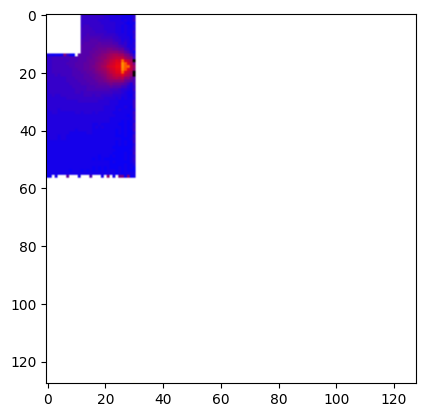

In [7]:
k = resp.json()["content"]
# k = base64.b64decode(k)
img = np.load(io.BytesIO(base64.b64decode(k)))
print(np.max(img), img.shape)
plt.imshow(img[:,:,:])

### Model convert

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("generator_model.keras")
# m = tf.saved_model.load("saved_model")  ## from .pb

In [ ]:
export_path = 'saved_model'
tf.saved_model.save(model, export_path)

### Generate predictions from a local model

In [ ]:
OUT_DIR = "out"

In [ ]:

def generate_pred(model, test_input, iteration_name):
    """ Generates and saves predictions for test images. """
    save_dir = os.path.join(OUT_DIR, iteration_name, "predictions")
    os.makedirs(save_dir, exist_ok=True)

    predictions = model(test_input, training=False).numpy()

    for i, pred in enumerate(predictions):
        pred = ((pred - pred.min()) / (pred.max() - pred.min())) * 255
        pred = pred.astype(np.uint8)
        img = Image.fromarray(pred)
        img.save(os.path.join(save_dir, f'prediction_{i}.png'))

In [ ]:
generate_pred(model, tf.reshape(im, (-1, 256, 256, 3)), "test")